## Final Project Submission

Please fill out:
* Student name: Group 14
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Overview

For this project, you will use multiple linear regression modeling to analyze house sales in a northwestern county

## Business Problem
A real estate agency that helps homeowners buy and/or sell homes. A business problem you could focus on for this stakeholder is the need to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount

## Objectives
1. Houses that require the least renovation that create high profit margin. 
2. Which zipcode has the best investement. 
3. 

In [68]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data into pandas and engineer "make" feature
data = pd.read_csv("./data/kc_house_data.csv")
data.tail(50)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21547,9406530090,10/20/2014,337000.0,4,2.50,2470,5100,2.0,NO,NONE,...,8 Good,2470,0.0,2005,0.0,98038,47.3622,-122.041,2240,5123
21548,7168100015,10/9/2014,579950.0,5,2.75,3080,5752,2.0,NO,NONE,...,9 Better,3080,0.0,2014,0.0,98059,47.4922,-122.153,3000,4650
21549,5007500120,2/26/2015,341780.0,4,2.75,2260,4440,2.0,NO,NONE,...,7 Average,2260,0.0,2014,0.0,98001,47.3507,-122.291,2260,4563
21550,3528900770,4/23/2015,710200.0,4,3.00,1670,2642,2.0,NaN,NONE,...,8 Good,1350,320.0,2008,0.0,98109,47.6397,-122.345,1670,2594
21551,9521100031,6/18/2014,690000.0,3,3.25,1540,1428,3.0,NO,NONE,...,9 Better,1540,0.0,2013,NaN,98103,47.6648,-122.353,1660,3300
21552,524059330,1/30/2015,1700000.0,4,3.50,3830,8963,2.0,NO,NONE,...,10 Very Good,3120,710.0,2014,0.0,98004,47.5990,-122.197,2190,10777
21553,6021503705,10/15/2014,329000.0,2,2.50,980,1020,3.0,NO,NONE,...,8 Good,980,0.0,2008,NaN,98117,47.6844,-122.387,980,1023
21554,3438501862,5/13/2014,330000.0,3,2.50,1450,5008,1.0,NO,NONE,...,7 Average,840,610.0,2007,0.0,98106,47.5435,-122.357,2120,5019
21555,3345700207,5/2/2015,608500.0,4,3.50,2850,5577,2.0,NO,NONE,...,8 Good,1950,900.0,2014,0.0,98056,47.5252,-122.192,2850,5708
21556,6056111067,7/7/2014,230000.0,3,1.75,1140,1201,2.0,NO,NONE,...,8 Good,1140,0.0,2014,NaN,98108,47.5637,-122.295,1210,1552


## Explanatory Data Analysis

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [72]:
data.describe() # Statistical distribution of the dataset

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [73]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

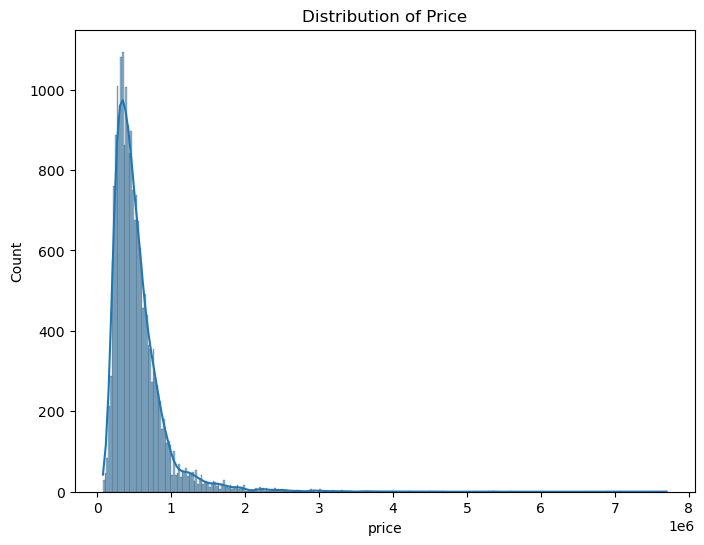

In [74]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='price', kde=True)
plt.title("Distribution of Price")
plt.show()

The diagram shows a positively skewed distribution of the price

In [75]:
### Check Correlation
data.corr()

C:\Users\Richard.LAPTOP-2O23AAHO\AppData\Local\Temp\ipykernel_32036\4189969887.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


C:\Users\Richard.LAPTOP-2O23AAHO\AppData\Local\Temp\ipykernel_32036\2507961814.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


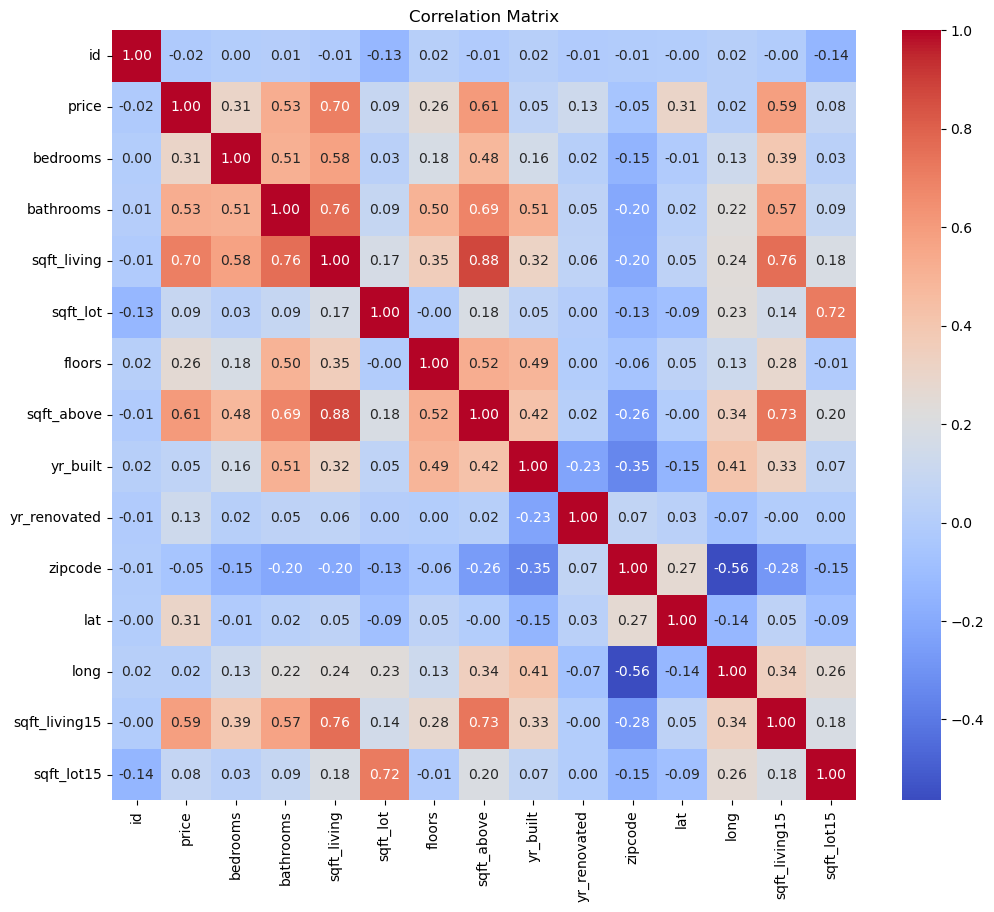

In [51]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

## Data Preparation

#### Data Cleaning

In [76]:
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [77]:
missing_values = data.isna() # Checks missing values 
missing_values.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [78]:
def missing_values(data):
    # identify the total missing values per column
    # sort in order
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe
    missing = pd.DataFrame({"Missing Values": miss, "Percentage": percentage_miss}).reset_index()

    # remove values that are missing
    missing.drop(missing[missing["Percentage"] == 0].index, inplace = True)

    return missing

In [79]:
missing_data = missing_values(data)
missing_data

,index,Missing Values,Percentage
0,yr_renovated,3842,0.177895
1,waterfront,2376,0.110015
2,view,63,0.002917


Replace the rows with the missing values for **View** with the mode of view

In [80]:
data['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [81]:
data['view'] = data['view'].fillna(data['view'].mode().iloc[0])

In [82]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Drop the rows with missing values in **Waterfront**

In [59]:
data['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [83]:
# Mode imputation for the missing values in waterfront
data.dropna(axis = 0, subset=['waterfront'], inplace=True)

In [84]:
# check forthe count unique values in the year renoveted colum
data['yr_renovated'].value_counts()

0.0       15157
2014.0       64
2013.0       29
2005.0       27
2000.0       25
          ...  
1967.0        1
1934.0        1
1944.0        1
1950.0        1
1974.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [85]:
# Replace null with the most frequent value
data['yr_renovated'].fillna(0,inplace=True)

In [86]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No Missing Values

In [87]:
# Drop rows with '?' in 'sqft_basement'
data = data[data['sqft_basement'] != '?']

# Reset the index of the DataFrame
data.reset_index(drop=True, inplace=True)

In [88]:
# Convert 'sqft_basement' column to float
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [91]:
## Covert the data type for data
data['date'] = pd.to_datetime(data['date'], format = '%m/%d/%Y' )

## Feature Engineering